In [1]:
import csv
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, log_loss
import seaborn as sns
import os
import ast
import sys
import re
from statistics import mean, stdev
statistics_path = os.path.abspath("../")
sys.path.append(statistics_path)
import stats_utils

In [2]:
path_to_exp_statistics = "/Users/admin/Desktop/thesis/dataset/metrics/"
path_to_exp_images = "/Users/admin/Desktop/thesis_writing/experiment_images/performance_exp/4_mix_skew/"

### 1. Compare the 2 different levels of mix skewness (30% - 3/6 missing, 10% - 5/6 missing)

In [3]:
labels_names_list = []
exp_name = "exp_4_1_1_dataset_1"
skew_1 = stats_utils.parse_experiments_statistics_to_df(path_to_exp_statistics, exp_name, csv_filename="logs.csv")
labels_names_list.append(stats_utils.load_label_names(path_to_exp_statistics, exp_name))

exp_name = "exp_4_2_1_dataset_1"
skew_2 = stats_utils.parse_experiments_statistics_to_df(path_to_exp_statistics, exp_name, csv_filename="logs.csv")
labels_names_list.append(stats_utils.load_label_names(path_to_exp_statistics, exp_name))

dfs = [skew_1, skew_2]

In [4]:
def plot_acc_loss_from_dfs(dfs, get_accuracy_loss_values, path_to_exp_images, should_save=False, filename="accuracies_for_every_dataset", label_names=None):
    accs = {}
    losses = {}

    for i, df in enumerate(dfs):
        label_name = label_names[i]
        first_client_name = ast.literal_eval(df['devices_names'][0])[0]
        acc, loss = get_accuracy_loss_values(df, first_client_name)
        accs[label_name] = acc
        losses[label_name] = loss

    rounds = range(1, len(next(iter(accs.values()))) + 1)

    # Plot Accuracy
    plt.figure(figsize=(10, 6))
    for name, values in accs.items():
        plt.plot(rounds, values, label=name)
    plt.title("Accuracy per Round")
    plt.xlabel("Federated Round")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    if should_save == False:
        plt.show()
    else:
#         filename = "accuracies_for_every_dataset"
        path_to_file = os.path.join(path_to_exp_images, filename)
        plt.savefig(path_to_file, dpi=300)
        plt.close()

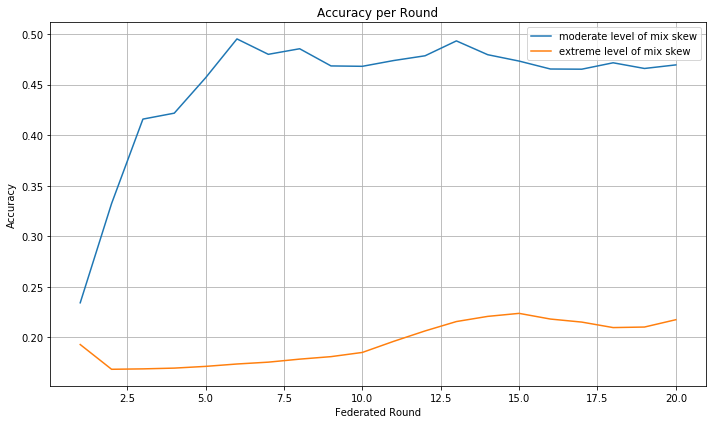

In [7]:
filename = "levels_of_mix_skew"
label_names = ["moderate level of mix skew", "extreme level of mix skew"]
plot_acc_loss_from_dfs(dfs, stats_utils.get_accuracy_loss_values_for_dfs, path_to_exp_images, \
                       should_save=False, filename=filename, label_names=label_names)

### 2. Save the confusion matrics for the 3 levels of quantity skew

In [8]:
def generate_confusion_matrix_only(y_true, y_pred, label_names, path_to_exp_logs, filename, figsize=(8,6)):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create and configure plot
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=label_names, yticklabels=label_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
#     plt.show()
    
    # Save plot
    path_to_file = os.path.join(path_to_exp_logs, filename)
    plt.savefig(path_to_file, dpi=300)
    plt.close()

In [9]:
idx = 0
for df, labels in zip(dfs, labels_names_list):
    first_client_name = ast.literal_eval(df['devices_names'][0])[0]
    y_true = json.loads(df['y_true'].iloc[-1])[first_client_name]
    y_pred = json.loads(df['y_pred'].iloc[-1])[first_client_name]
    idx += 1
    filename = "confusion_matrix_mix_level_" + str(idx)
    generate_confusion_matrix_only(y_true, y_pred, labels, path_to_exp_images,filename)

### 3. For every quantity skew level compare the 1 client case 

In [11]:
labels_names_list_single_client = []
exp_name = "exp_4_1_1_dataset_1_single_client"
skew_1_single_client = stats_utils.parse_experiments_statistics_to_df(path_to_exp_statistics, exp_name, csv_filename="logs.csv")
labels_names_list_single_client.append(stats_utils.load_label_names(path_to_exp_statistics, exp_name))

exp_name = "exp_4_2_1_dataset_1_single_client"
skew_2_single_client = stats_utils.parse_experiments_statistics_to_df(path_to_exp_statistics, exp_name, csv_filename="logs.csv")
labels_names_list_single_client.append(stats_utils.load_label_names(path_to_exp_statistics, exp_name))

dfs_single_client = [skew_1_single_client, skew_2_single_client]

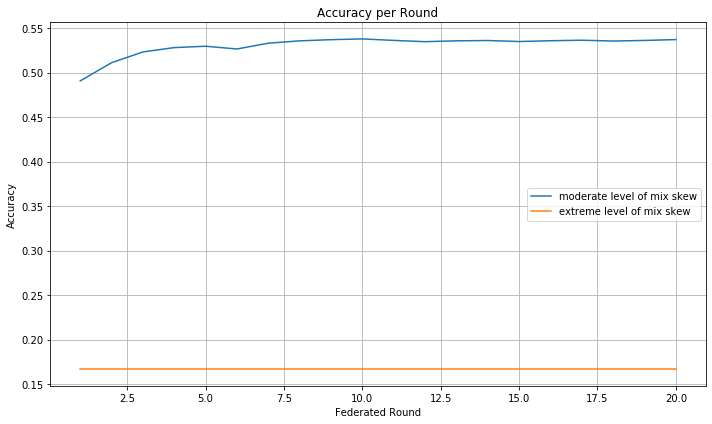

In [30]:
filename = "levels_of_mix_skew_single_client_case"
label_names = ["moderate level of mix skew", "extreme level of mix skew"]
plot_acc_loss_from_dfs(dfs_single_client, stats_utils.get_accuracy_loss_values_for_dfs, path_to_exp_images, \
                       should_save=False, filename=filename, label_names=label_names)

In [15]:
idx = 0
for df, labels in zip(dfs_single_client, labels_names_list_single_client):
    first_client_name = ast.literal_eval(df['devices_names'][0])[0]
    y_true = json.loads(df['y_true'].iloc[-1])[first_client_name]
    y_pred = json.loads(df['y_pred'].iloc[-1])[first_client_name]
    idx += 1
    filename = "confusion_matrix_skew_level_with_single_client" + str(idx)
    generate_confusion_matrix_only(y_true, y_pred, labels, path_to_exp_images,filename)

### 4. For every skew level compare the single client with the 5 client case

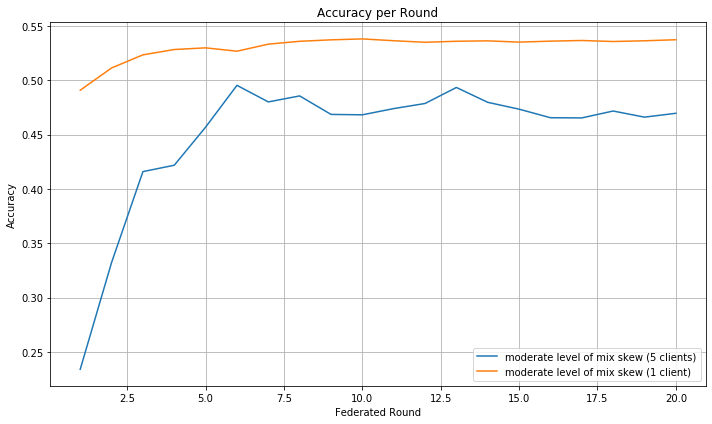

In [27]:
### mix skew level 1
filename = "skew_level_1_single_vs_multiple_clients"
label_names = ["moderate level of mix skew (5 clients)", "moderate level of mix skew (1 client)"]

dfs = [skew_1, skew_1_single_client]
plot_acc_loss_from_dfs(dfs, stats_utils.get_accuracy_loss_values_for_dfs, path_to_exp_images, \
                       should_save=False, filename=filename, label_names=label_names)

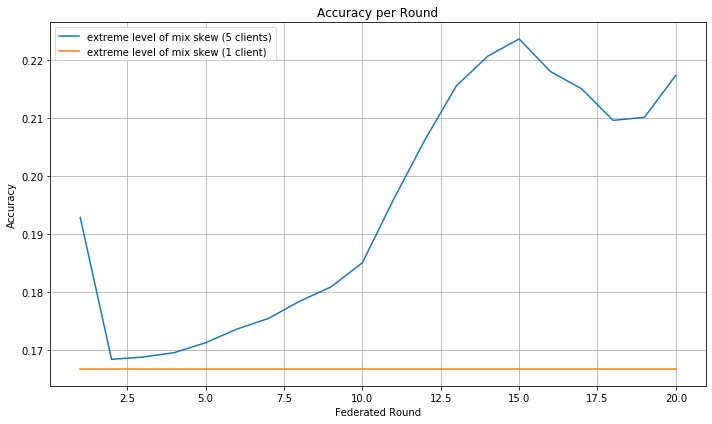

In [28]:
### mix skew level 2
filename = "skew_level_2_single_vs_multiple_clients"
label_names = ["extreme level of mix skew (5 clients)", "extreme level of mix skew (1 client)"]

dfs = [skew_2, skew_2_single_client]
plot_acc_loss_from_dfs(dfs, stats_utils.get_accuracy_loss_values_for_dfs, path_to_exp_images, \
                       should_save=False, filename=filename, label_names=label_names)